In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, UpSampling2D, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
BATCH_SIZE = 64
EPOCHS = 6
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train = tf.keras.applications.vgg16.preprocess_input(x_train)
x_test = tf.keras.applications.vgg16.preprocess_input(x_test)

In [ ]:
# Input layer
inputs = layers.Input(shape=(32, 32, 3))

# Resize the image to 224x224
resize = layers.UpSampling2D(size=(7, 7))(inputs)

# VGG16 as feature extractor
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_features = vgg_base(resize)

# Global Average Pooling and Dense Layers for Classification
x = layers.GlobalAveragePooling2D()(vgg_features)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
classification_output = layers.Dense(10, activation="softmax", name="classification")(x)

In [ ]:
model = models.Model(inputs=inputs, outputs=classification_output)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classification (Dense)               │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,769,930 (60.16 MB)

 Trainable params: 15,769,930 (60.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test))

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 769s 983ms/step - accuracy: 0.9595 - loss: 0.1186 - val_accuracy: 0.9142 - val_loss: 0.2663
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 802s 983ms/step - accuracy: 0.9746 - loss: 0.0744 - val_accuracy: 0.9297 - val_loss: 0.2377
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 800s 980ms/step - accuracy: 0.9859 - loss: 0.0440 - val_accuracy: 0.9308 - val_loss: 0.2521


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 240ms/step - accuracy: 0.9318 - loss: 0.2388
Test Loss: 0.2521, Test Accuracy: 0.9308


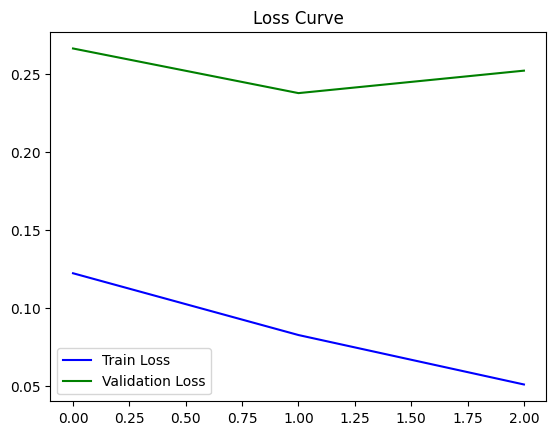

In [ ]:
# Plot Loss Curve
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title("Loss Curve")
plt.legend()
plt.show()

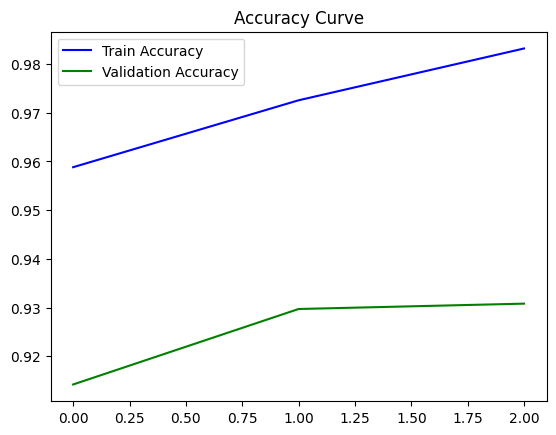

In [ ]:
# Plot Accuracy Curve
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title("Accuracy Curve")
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test, batch_size=BATCH_SIZE)
y_pred_classes = np.argmax(y_pred, axis=1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 229ms/step


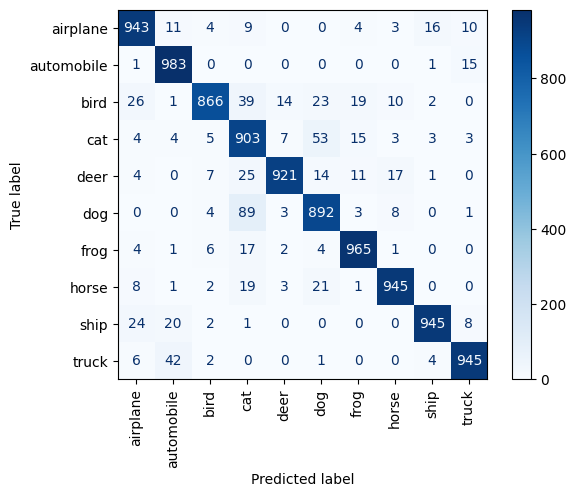

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d')
plt.show()

<ipython-input-24-bb3b7edb2e68>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = CLASS_NAMES[int(y_test[idx])]


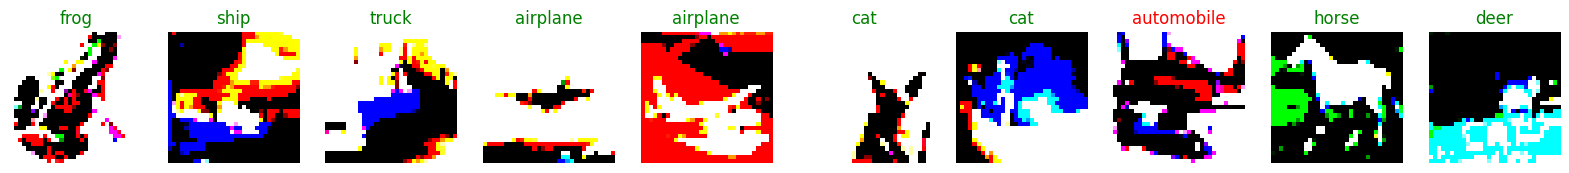

In [ ]:
# Display a random set of predictions with their true labels
indexes = np.random.choice(len(x_test), size=10)
plt.figure(figsize=(20, 4))
for i, idx in enumerate(indexes):
    plt.subplot(1, 10, i + 1)
    plt.imshow((x_test[idx] + 1) / 2)  # Denormalize
    pred_label = CLASS_NAMES[y_pred_classes[idx]]
    true_label = CLASS_NAMES[int(y_test[idx])]
    color = "green" if pred_label == true_label else "red"
    plt.title(pred_label, color=color)
    plt.axis("off")
plt.show()